# HW3

## Decision Trees

### Team members
#### Team 3
 - Anjali Sebastian
 - Rupansh Phutela
 - Yesha Sharma

### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. Let's check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Run and check the outputs. 

### Confusion matrix plot

In [2]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Confusion matrix simple example 1

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


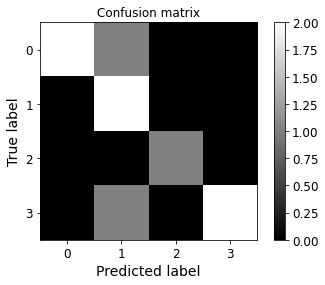

In [3]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)

print(confusion_mat)
plot_confusion_matrix(confusion_mat, 4)

In [4]:
# Print classification report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics = classification_report(y_true, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Confusion matrix simple example 2

[[2 2]
 [0 5]]


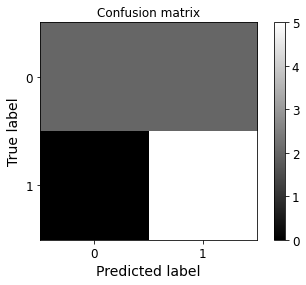

In [5]:
y_true2 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred2 = [1, 1, 0, 1, 1, 0, 1, 1, 1]
confusion_mat2 = confusion_matrix(y_true2, y_pred2)

print(confusion_mat2)
plot_confusion_matrix(confusion_mat2, 2)

In [6]:
# Print classification report
target_names2 = ['Class-0', 'Class-1']

result_metrics = classification_report(y_true2, y_pred2, target_names=target_names2)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



## Data Visualization

### iris dataset before we start training and testing a model
#### use pandas  pd.plotting.scatter_matrix

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

/var/folders/wz/88qmbx0907b9r93k2czdqckw0000gn/T/ipykernel_24415/1488047156.py:18: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)


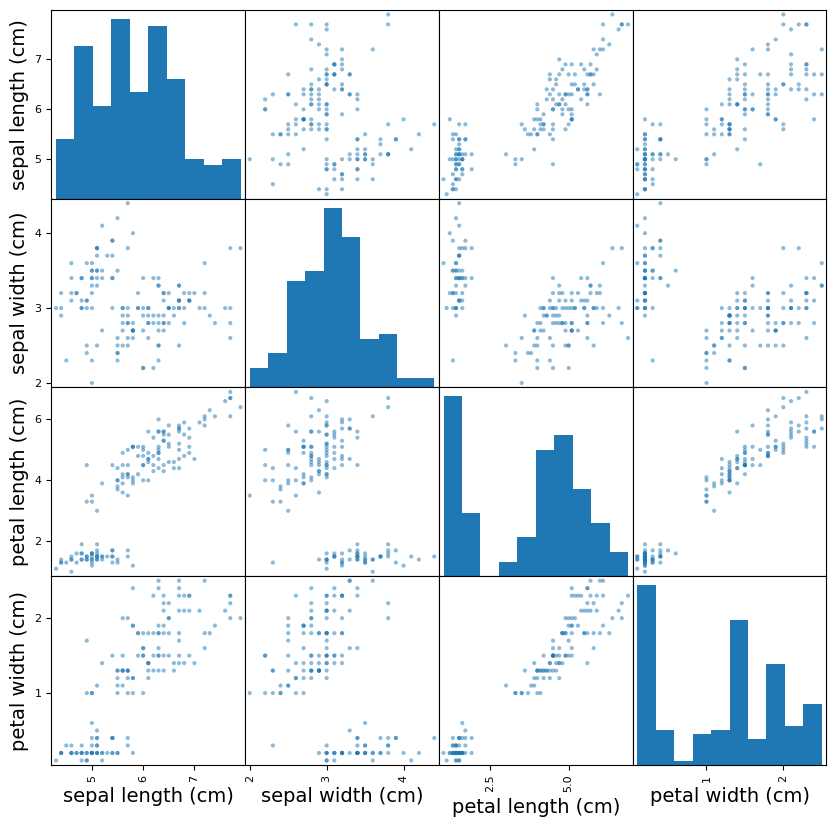

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('iris.csv')
print(iris.head())
print(iris.tail())
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# Load some data
iris = datasets.load_iris()
print(iris['feature_names'])
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# scatter matrix plot
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

_ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)
_ = ax.set_title('Scatter matrix')
plt.show()



# Decision Trees

### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine. 

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
#print(iris)

### Split the data to training and testing 

In [9]:
X = iris.data[:, 2:] # petal length and width
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training
### Learing using training data

- use Gini index measure 

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Testing
### Evaluating the model using testing data

In [11]:
y_pred = tree_clf.predict(X_test)

# Visualization

## Confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


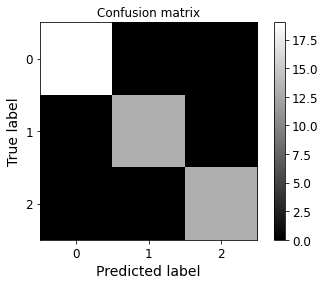

In [12]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

### Model performance summary

In [13]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [14]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['setosa']['precision'])

1.0


### Draw a decision tree
notice that using graphviz is not the only method to draw decision tree.  You can also use  sklearn.tree.plot_tree

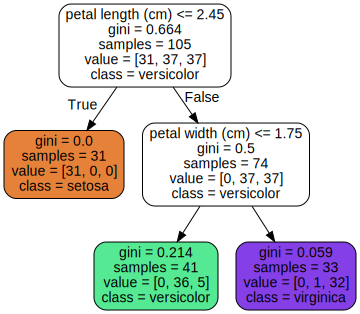

In [15]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## k-Cross Validation

- using sklearn corss_val_score() function

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, iris.data, iris.target, cv=3)

array([0.96, 0.92, 0.92])

## k-Cross Validation

- using KFold function with freedom

In [17]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.79      0.88        14

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.92        19

    accuracy        

# Decision Tree boundary Visualization

In [19]:
## Example  This function is meant to be used for other data besides iris.  

Saving figure decision_tree_decision_boundaries_plot


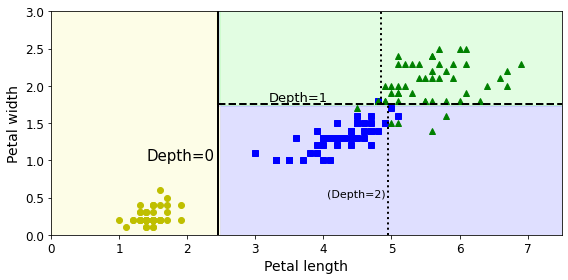

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [21]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.91428571, 0.08571429]])

In [22]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [23]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower


array([[4.8, 1.8]])

In [24]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


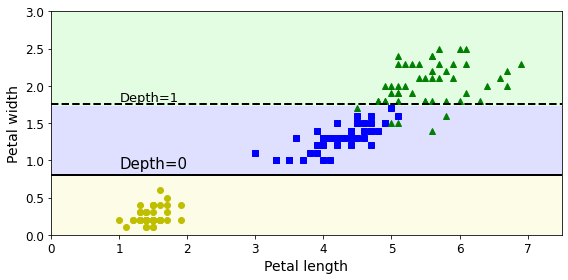

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

# =========  HW3 =============

##  ===============================

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

### 1. LOAD DATASET AND IMPORTS

In [26]:
# Import the data, classifier, and metrics libraries similar to what we did above
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Import sns for scatter plots
import seaborn as sns

#import data
iris = pd.read_csv('iris.csv')
print('Head for CSV : \n ',iris.head())
print('Tail for CSV : \n ',iris.tail())

#Train Test Split
from sklearn.model_selection import train_test_split

# load iris dataset and confirm data has been loaded by printing first few lines
from sklearn.datasets import load_iris

iris = load_iris()
print('Feature Names for Dataset : \n ',iris['feature_names'])
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

print('Head for Dataset : \n ',iris_df.head())
print('Tail for Dataset : \n ',iris_df.tail())

Head for CSV : 
     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Tail for CSV : 
        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virgi

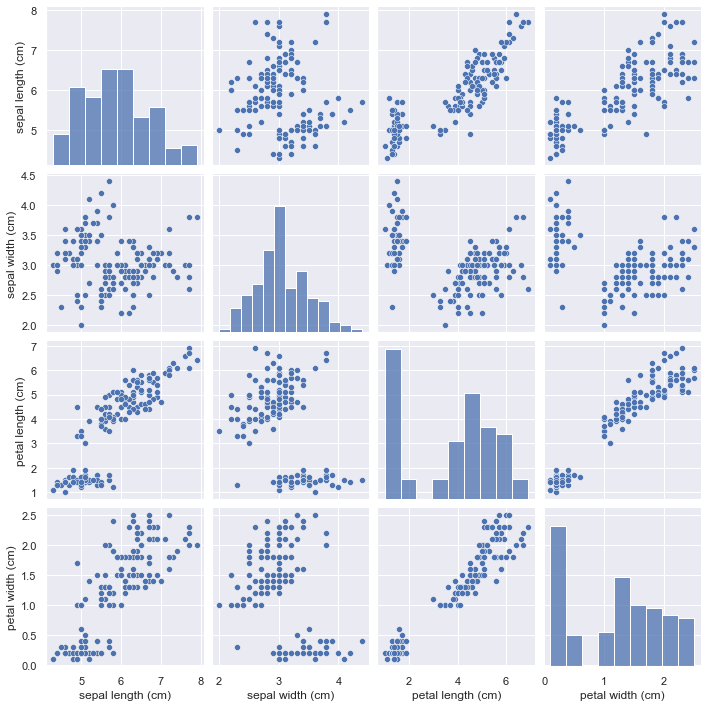

In [27]:
#Scatters plots
sns.set()
sns.pairplot(iris_df)

#### Train test split

In [28]:
# Split data into testing and training
X = iris.data[:, 2:] # petal length and petal width
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 2. DECISION TREE WITH ENTROPY

In [29]:
# Create decision tree and set criterion to information gain (entropy)
tree_clf_md2_ent = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
tree_clf_md2_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [30]:
# Predict
y_pred = tree_clf_md2_ent.predict(X_test)

[[ 8  0  0]
 [ 0 17  5]
 [ 0  1 14]]


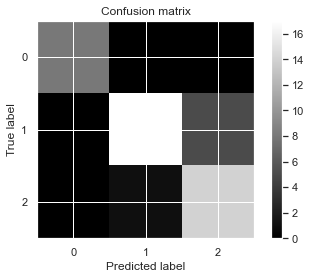

In [31]:
# plot a confusion matrix
confusion_mat_md2_ent = confusion_matrix(y_test, y_pred)
print(confusion_mat_md2_ent)
plot_confusion_matrix(confusion_mat_md2_ent, 3)

In [32]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.94      0.77      0.85        22
   virginica       0.74      0.93      0.82        15

    accuracy                           0.87        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.89      0.87      0.87        45



In [33]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print(result_metrics_dict['setosa']['precision'])

1.0


### 3. VISUALIZE THE TREE (ENTROPY)

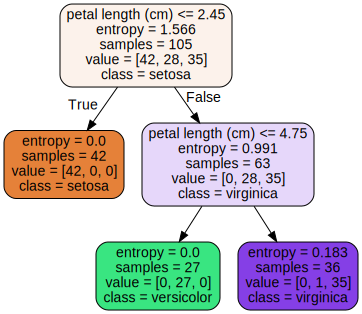

In [34]:
# Visualize the new tree that you constructed  using graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf_md2_ent,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_md2_entropy.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_md2_entropy.dot"))

### 4. CROSS VALIDATION SCORE 10-FOLD (ENTROPY)

In [35]:
# Apply 10-fold cross validation score 
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf_md2_ent, iris.data, iris.target, cv=10)

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.86666667, 1.        , 1.        , 1.        ])

# Section 1: 10 Fold Cross Validation Trees
- Tree with max depth 2
- Tree with max depth 3
- Tree with max depth 4
- Tree with max depth 5
---

In [36]:
# Setup for K-fold = 10 

# Parse and bin the data into   10 folds for validation 

# import k-fold validation 
from sklearn.model_selection import KFold 

# Define the split - into 10 folds
kf_10_all = KFold(n_splits=10, random_state=None, shuffle=True) 

# returns the number of splitting iterations in the cross-validator
kf_10_all.get_n_splits(X) 

print(kf_10_all) 

KFold(n_splits=10, random_state=None, shuffle=True)


### 5. K-FOLD Cross Validation (10-folds - Max Depth = 2 Default ) with Entropy

#### 5.1 Apply K-fold and Classification Report

In [37]:
# Apply the 10-fold cross validation we've created
tree_clf_10f_md2_ent = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)

for train_index, test_index in kf_10_all.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_10f_md2_ent.fit(X_train, y_train)
    
    y_pred = tree_clf_10f_md2_ent.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         2
  versicolor       0.50      1.00      0.67         2
   virginica       1.00      0.82      0.90        11

    accuracy                           0.87        15
   macro avg       0.83      0.94      0.86        15
weighted avg       0.93      0.87      0.88        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.86      0.92         7
   virginica       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         5

    accuracy        

In [38]:
# Cross Validation Score

#### 5.3. Graphviz

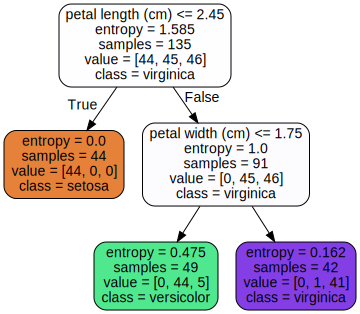

In [39]:
export_graphviz(
        tree_clf_10f_md2_ent,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_10f_md2_entropy.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_10f_md2_entropy.dot"))

#### 5.4. Plot the decision boundry (entropy)

Saving figure decision_tree_decision_boundaries_plot_10f_md2_entropy


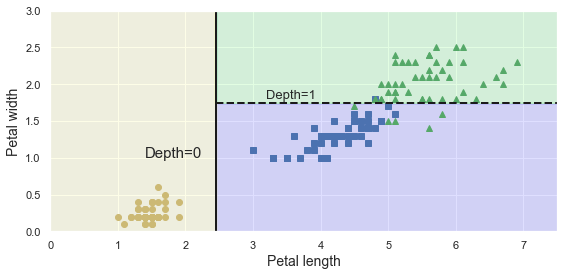

In [40]:
# Plot the decision boundry graph for the entropy model
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_10f_md2_ent, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
# plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot_10f_md2_entropy")
plt.show()

# 6. Explain what is the relationship between the drawn decision bondries and gini index . Comparsion ???

### Comparison

#comparison box

# 7Changing Depths and K-Folds
Change the depth of the decision tree to 3, 4, and  5 for both entropy and gini

---

### 7.1 Max Depth = 3, K-Folds = 10, Criterion = Entropy

In [41]:
# Apply the 10-fold cross validation we've created
tree_clf_10f_md3_ent = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_10f_md3_ent.fit(X_train, y_train)
    
    y_pred = tree_clf_10f_md3_ent.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.82      0.88        22
   virginica       0.78      0.93      0.85        15

    accuracy                           0.90        50
   macro avg       0.91      0.92      0.91        50
weighted avg       0.91      0.90      0.90        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.81      0.93      0.87        14
   virginica       0.94      0.83      0.88        18

    accuracy        

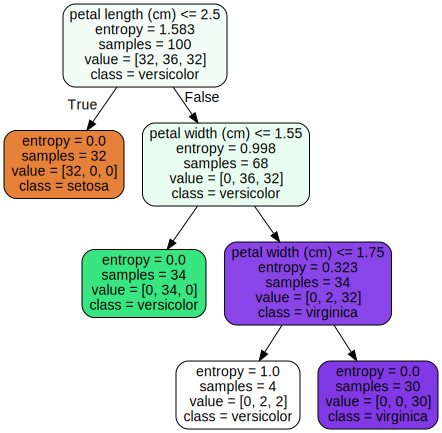

In [42]:
#Graphviz
export_graphviz(
        tree_clf_10f_md3_ent,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_10f_md3_entropy.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_10f_md3_entropy.dot"))

Saving figure decision_tree_decision_boundaries_plot_10f_md3_entropy


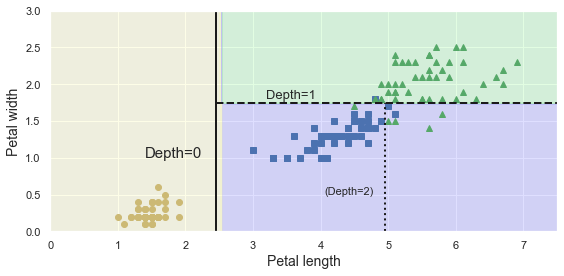

In [43]:
# Plot the decision boundry graph for the model
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_10f_md3_ent, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot_10f_md3_entropy")
plt.show()

### 7.2 Max Depth = 4, K-Folds = 10, Criterion = Entropy

In [44]:
# Apply the 10-fold cross validation we've created
tree_clf_10f_md4_ent = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_10f_md4_ent.fit(X_train, y_train)
    
    y_pred = tree_clf_10f_md4_ent.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.89      0.94        19
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.97      0.96      0.96        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.69      1.00      0.81        11
   virginica       1.00      0.76      0.86        21

    accuracy                           0.90        50
   macro avg       0.90      0.92      0.89        50
weighted avg       0.93      0.90      0.90        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.95      0.97        20
   virginica       0.94      1.00      0.97        16

    accuracy        

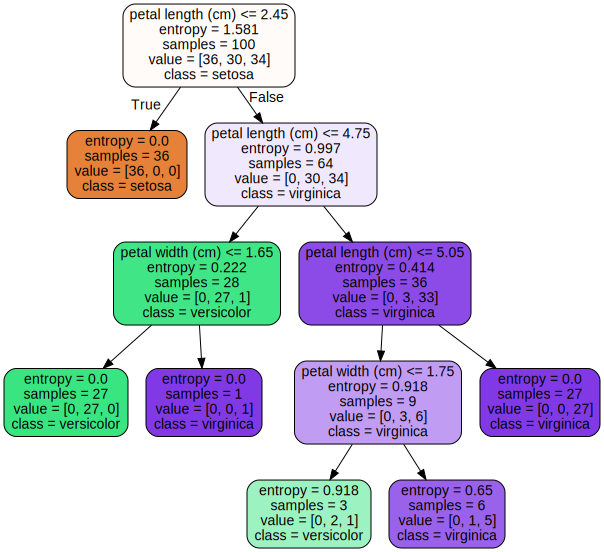

In [45]:
#Graphviz
export_graphviz(
        tree_clf_10f_md4_ent,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_10f_md4_entropy.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_10f_md4_entropy.dot"))

Saving figure decision_tree_decision_boundaries_plot_10f_md4_entropy


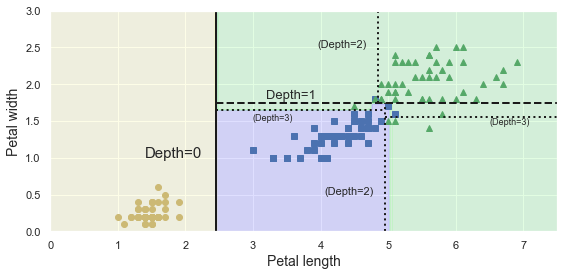

In [46]:
# Plot the decision boundry graph for the model
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_10f_md4_ent, X, y)
plt.plot([2.45, 2.45], [0.00, 3.00], "k-", linewidth=2)
plt.plot([2.45, 7.50], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0.00, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3.00], "k:", linewidth=2)
plt.plot([4.95, 7.50], [1.55, 1.55], "k:", linewidth=2)
plt.plot([2.45, 4.95], [1.65, 1.65], "k:", linewidth=2)

plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.text(3.95, 2.5, "(Depth=2)", fontsize=11)
plt.text(6.50, 1.45, "(Depth=3)", fontsize=9)
plt.text(3.00, 1.5, "(Depth=3)", fontsize=9)


save_fig("decision_tree_decision_boundaries_plot_10f_md4_entropy")
plt.show()

### 7.3 Max Depth = 5, K-Folds = 10, Criterion = Entropy

In [47]:
# Apply the 10-fold cross validation we've created
tree_clf_10f_md5_ent = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_10f_md5_ent.fit(X_train, y_train)
    
    y_pred = tree_clf_10f_md5_ent.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.89      0.94      0.91        17
   virginica       0.94      0.89      0.91        18

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.93      0.76      0.84        17
   virginica       0.71      0.91      0.80        11

    accuracy                           0.90        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.91      0.90      0.90        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.79      0.94      0.86        16
   virginica       0.94      0.81      0.87        21

    accuracy        

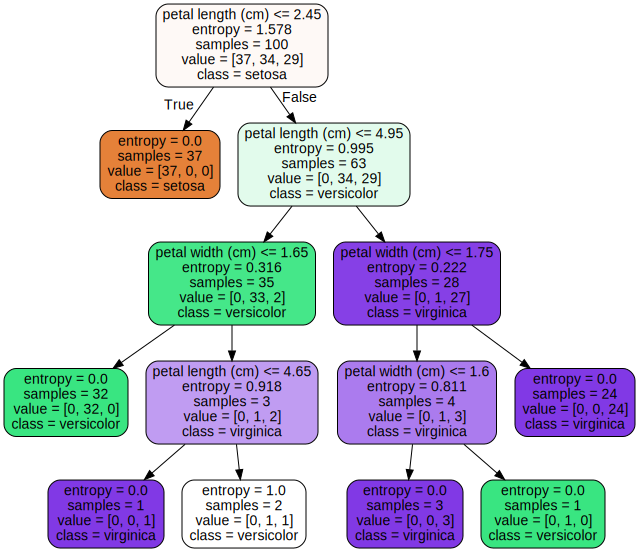

In [48]:
#Graphviz
export_graphviz(
        tree_clf_10f_md5_ent,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_10f_md5_entropy.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_10f_md5_entropy.dot"))

Saving figure decision_tree_decision_boundaries_plot_10f_md5_entropy


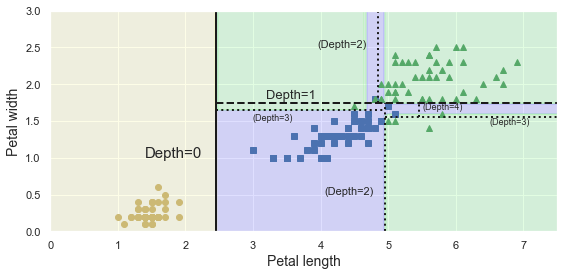

In [49]:
# Plot the decision boundry graph for the model
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_10f_md5_ent, X, y)
plt.plot([2.45, 2.45], [0.00, 3.00], "k-", linewidth=2)
plt.plot([2.45, 7.50], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0.00, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3.00], "k:", linewidth=2)
plt.plot([4.95, 7.50], [1.55, 1.55], "k:", linewidth=2)
plt.plot([2.45, 4.95], [1.65, 1.65], "k:", linewidth=2)
plt.plot([5.45, 5.45], [1.55, 1.75], "k:", linewidth=2)

plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.text(3.95, 2.5, "(Depth=2)", fontsize=11)
plt.text(6.50, 1.45, "(Depth=3)", fontsize=9)
plt.text(3.00, 1.5, "(Depth=3)", fontsize=9)
plt.text(5.50, 1.65, "(Depth=4)", fontsize=9)

save_fig("decision_tree_decision_boundaries_plot_10f_md5_entropy")
plt.show()

### 7.4. Max Depth = 3, K-Folds = 5, Criterion = Entropy

In [50]:
# Create the 5 fold cv 
kf_5f = KFold(n_splits=5, random_state=None, shuffle=True)  
kf_5f.get_n_splits(X) 
print(kf_5f) 

KFold(n_splits=5, random_state=None, shuffle=True)


In [51]:
# Validate output on the tree with depth 3 entropy
tree_clf_5f_md3_ent = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)

for train_index, test_index in kf_5f.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_5f_md3_ent.fit(X_train, y_train)
    
    y_pred = tree_clf_5f_md3_ent.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.67      0.80         9
   virginica       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.89      0.89        30
weighted avg       0.93      0.90      0.90        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.91      0.91      0.91        11
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      0.93      0.97        15
   virginica       0.89      1.00      0.94         8

    accuracy        

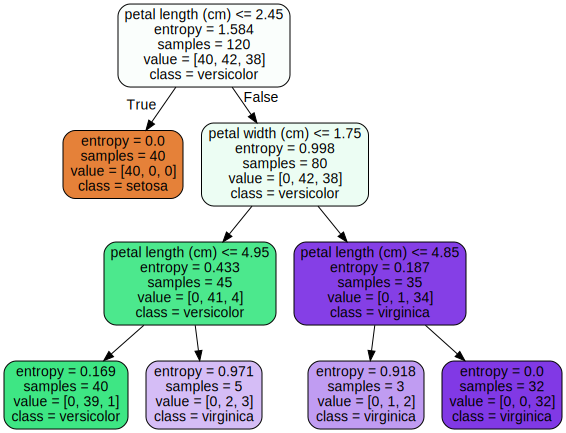

In [52]:
#Graphviz
export_graphviz(
        tree_clf_5f_md3_ent,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_5f_md3_entropy.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_5f_md3_entropy.dot"))

Saving figure decision_tree_decision_boundaries_plot_5f_md3_entropy


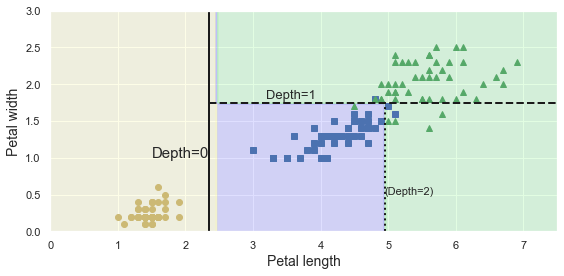

In [53]:
#Decision Boundary 
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_5f_md3_ent, X, y)
plt.plot([2.35, 2.35], [0, 3], "k-", linewidth=2)
plt.plot([2.35, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.50, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.95, 0.5, "(Depth=2)", fontsize=11)
# plt.text(4.85, 2, "(Depth=2)", fontsize=11)


save_fig("decision_tree_decision_boundaries_plot_5f_md3_entropy")
plt.show()

### 7.5. Max Depth = 3, K-Folds = 5, Criterion = Gini

In [54]:
# Validate output on the tree with depth 3 gini

tree_clf_5f_md3_gini = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)

for train_index, test_index in kf_5f.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_5f_md3_gini.fit(X_train, y_train)
    
    y_pred = tree_clf_5f_md3_gini.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.92      0.96        12
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.88      0.93         8

    accuracy        

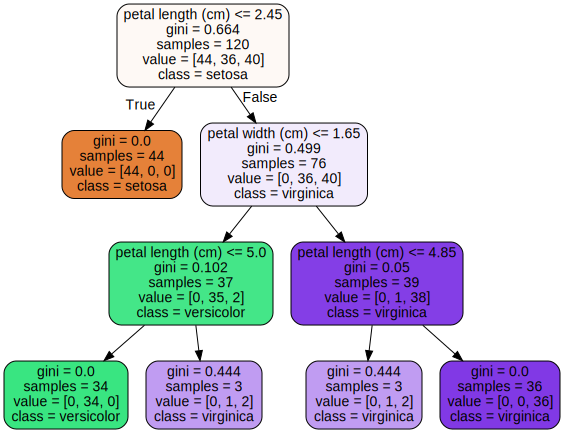

In [55]:
#Graphviz
export_graphviz(
        tree_clf_5f_md3_gini,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_5f_md3_gini.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_5f_md3_gini.dot"))


Saving figure decision_tree_decision_boundaries_plot_5f_md3_gini


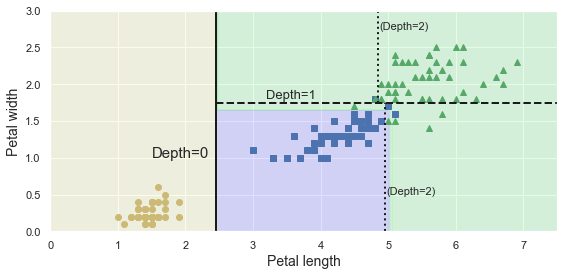

In [56]:
## #Decision Boundary
#Decision Boundary 
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_5f_md3_gini, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.50, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.97, 0.5, "(Depth=2)", fontsize=11)
plt.text(4.87, 2.75, "(Depth=2)", fontsize=11)


save_fig("decision_tree_decision_boundaries_plot_5f_md3_gini")
plt.show()

### 7.6. Max Depth = 4, K-Folds = 7, Criterion = Entropy

In [57]:
# Create the 7 fold cv 
kf_7f = KFold(n_splits=7, random_state=None, shuffle=True)  
kf_7f.get_n_splits(X) 
print(kf_7f) 

KFold(n_splits=7, random_state=None, shuffle=True)


In [58]:
# Validate output on the tree with depth 4 Entropy
# Validate output on the tree with depth 3 entropy
tree_clf_7f_md4_ent = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)

for train_index, test_index in kf_7f.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_7f_md4_ent.fit(X_train, y_train)
    
    y_pred = tree_clf_7f_md4_ent.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.57      1.00      0.73         4
   virginica       1.00      0.70      0.82        10

    accuracy                           0.86        22
   macro avg       0.86      0.90      0.85        22
weighted avg       0.92      0.86      0.87        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.91      0.91      0.91        11
   virginica       0.80      0.80      0.80         5

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.88      0.93         8

    accuracy        

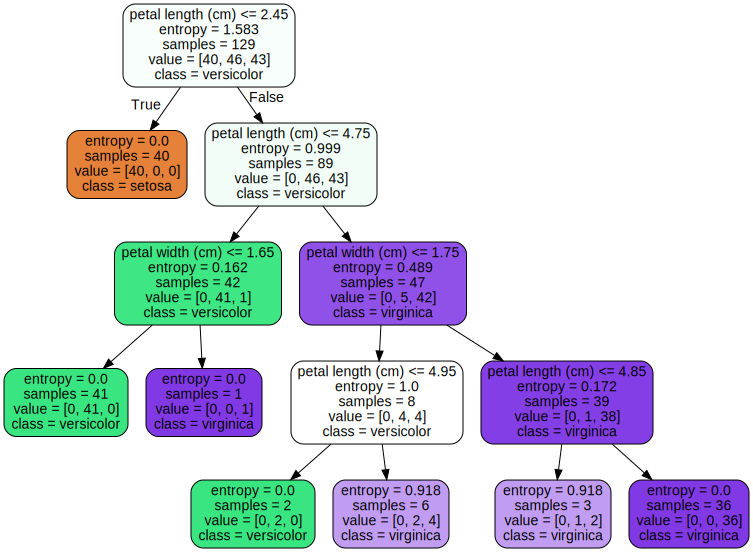

In [59]:
#Graphviz

export_graphviz(
        tree_clf_7f_md4_ent,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_7f_md4_entropy.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_7f_md4_entropy.dot"))

Saving figure decision_tree_decision_boundaries_plot_7f_md4_entropy


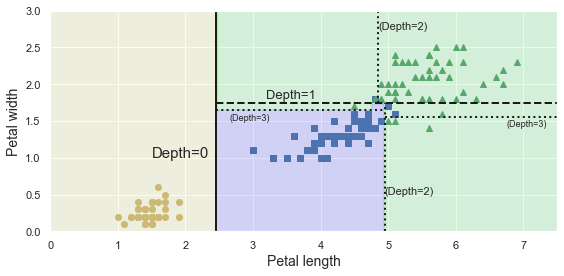

In [60]:
#Decision Boundary 
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_7f_md4_ent, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.plot([2.45, 4.95], [1.65, 1.65], "k:", linewidth=2)
plt.plot([4.95, 7.5], [1.55, 1.55], "k:", linewidth=2)


plt.text(1.50, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.95, 0.5, "(Depth=2)", fontsize=11)
plt.text(4.85, 2.75, "(Depth=2)", fontsize=11)
plt.text(2.65, 1.5, "(Depth=3)", fontsize=9)
plt.text(6.75, 1.43, "(Depth=3)", fontsize=9)

save_fig("decision_tree_decision_boundaries_plot_7f_md4_entropy")
plt.show()

### 7.7. Max Depth = 4, K-Folds = 7, Criterion = Gini

In [61]:
# Validate output on the tree with depth 4 gini

tree_clf_7f_md4_gini = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)

for train_index, test_index in kf_7f.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_7f_md4_gini.fit(X_train, y_train)
    
    y_pred = tree_clf_7f_md4_gini.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.88      0.93         8

    accuracy                           0.95        22
   macro avg       0.96      0.96      0.96        22
weighted avg       0.96      0.95      0.95        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.75      0.86         4
   virginica       0.89      1.00      0.94         8

    accuracy                           0.95        22
   macro avg       0.96      0.92      0.93        22
weighted avg       0.96      0.95      0.95        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.86      0.75      0.80         8
   virginica       0.67      0.80      0.73         5

    accuracy        

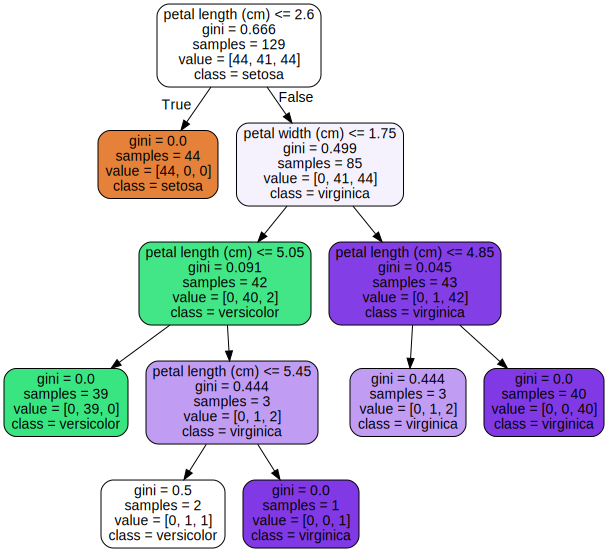

In [62]:
#Graphviz
export_graphviz(
        tree_clf_7f_md4_gini,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_7f_md4_gini.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )


Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_7f_md4_gini.dot"))

Saving figure decision_tree_decision_boundaries_plot_7f_md4_gini


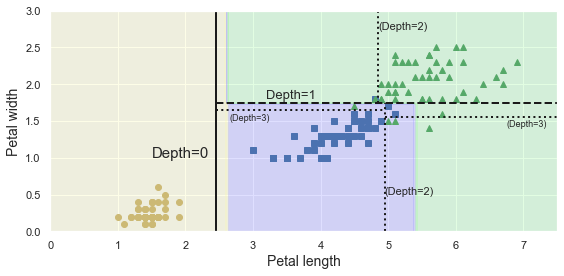

In [63]:
# Decision Boundary
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_7f_md4_gini, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.plot([2.45, 4.95], [1.65, 1.65], "k:", linewidth=2)
plt.plot([4.95, 7.5], [1.55, 1.55], "k:", linewidth=2)


plt.text(1.50, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.95, 0.5, "(Depth=2)", fontsize=11)
plt.text(4.85, 2.75, "(Depth=2)", fontsize=11)
plt.text(2.65, 1.5, "(Depth=3)", fontsize=9)
plt.text(6.75, 1.43, "(Depth=3)", fontsize=9)


save_fig("decision_tree_decision_boundaries_plot_7f_md4_gini")
plt.show()

### 7.8. Max Depth = 5, K-Folds = 10, Criterion = Entropy

In [64]:
# Create the 10 fold cv  
kf_10f = KFold(n_splits=10, random_state=None, shuffle=True)  
kf_10f.get_n_splits(X) 
print(kf_10f)

KFold(n_splits=10, random_state=None, shuffle=True)


In [65]:
# Validate output on the tree with depth 5 Entropy
tree_clf_10f_md5_ent = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)

for train_index, test_index in kf_10f.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_10f_md5_ent.fit(X_train, y_train)
    
    y_pred = tree_clf_10f_md5_ent.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         3
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         2
  versicolor       0.78      1.00      0.88         7
   virginica       1.00      0.67      0.80         6

    accuracy        

/Users/anjali/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


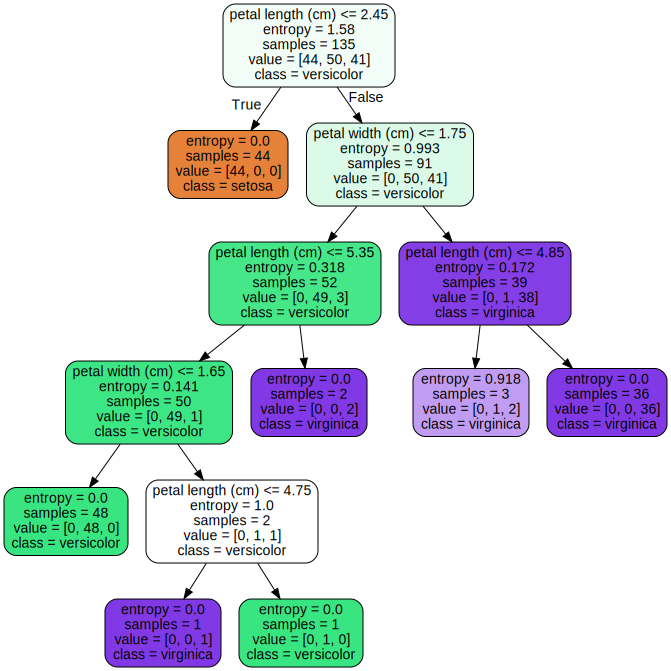

In [66]:
#Graphviz

export_graphviz(
        tree_clf_10f_md5_ent,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_10f_md5_entropy.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_10f_md5_entropy.dot"))

Saving figure decision_tree_decision_boundaries_plot_10f_md5_entropy


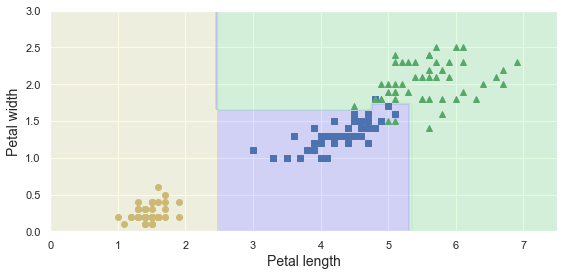

In [67]:
#Decision Boundary 
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_10f_md5_ent, X, y)
# plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
# plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
# plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.plot([2.45, 4.95], [1.65, 1.65], "k:", linewidth=2)
# plt.plot([4.95, 7.5], [1.55, 1.55], "k:", linewidth=2)
# plt.plot([5.45, 5.45], [1.55, 1.75], "k:", linewidth=2)


# plt.text(1.50, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.95, 0.5, "(Depth=2)", fontsize=11)
# plt.text(4.85, 2.75, "(Depth=2)", fontsize=11)
# plt.text(2.65, 1.5, "(Depth=3)", fontsize=9)
# plt.text(6.75, 1.43, "(Depth=3)", fontsize=9)
# plt.text(5.45, 1.6, "(Depth=4)", fontsize=7)

save_fig("decision_tree_decision_boundaries_plot_10f_md5_entropy")
plt.show()

### 7.9. Max Depth = 5, K-Folds = 10, Criterion = Gini

In [68]:
# Validate output on the tree with depth 5 gini
tree_clf_10f_md5_gini = DecisionTreeClassifier(max_depth=5, criterion="gini", random_state=42)

for train_index, test_index in kf_10f.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_10f_md5_gini.fit(X_train, y_train)
    
    y_pred = tree_clf_10f_md5_gini.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      0.83      0.91         6
   virginica       0.67      1.00      0.80         2

    accuracy                           0.93        15
   macro avg       0.89      0.94      0.90        15
weighted avg       0.96      0.93      0.94        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      0.88      0.93         8
   virginica       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.96      0.93        15
weighted avg       0.95      0.93      0.94        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.75      1.00      0.86         3
   virginica       1.00      0.80      0.89         5

    accuracy        

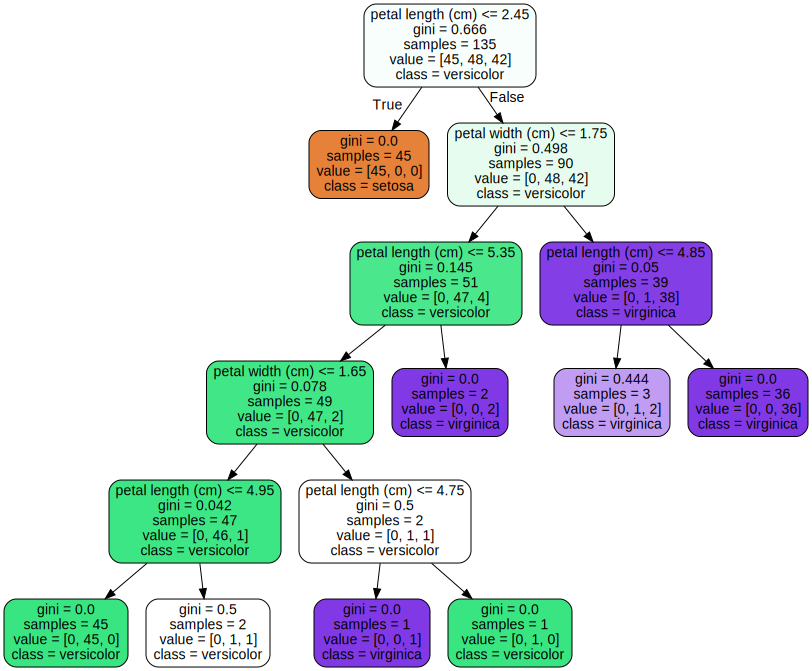

In [69]:
#Graphviz

export_graphviz(
        tree_clf_10f_md5_gini,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_10f_md5_gini.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_10f_md5_gini.dot"))

Saving figure decision_tree_decision_boundaries_plot_10f_md5_gini


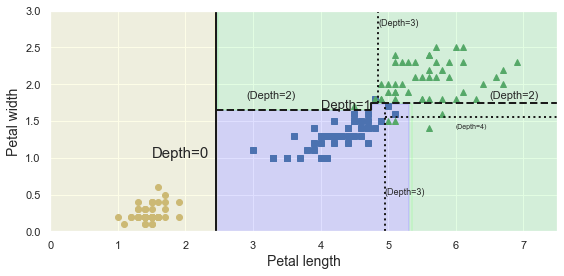

In [70]:
#Decision Boundary 
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_10f_md5_gini, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([4.75, 4.75], [1.65, 1.75], "k-", linewidth=2)
plt.plot([2.45, 4.75], [1.65, 1.65], "k--", linewidth=2)
plt.plot([4.75, 7.50], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.95, 7.50], [1.55, 1.55], "k:", linewidth=2)

plt.text(1.50, 1.0, "Depth=0", fontsize=15)
plt.text(4.00, 1.67, "Depth=1", fontsize=13)
plt.text(2.90, 1.80, "(Depth=2)", fontsize=11)
plt.text(6.50, 1.80, "(Depth=2)", fontsize=11)
plt.text(4.95, 0.50, "(Depth=3)", fontsize=9)
plt.text(4.85, 2.80, "(Depth=3)", fontsize=9)
plt.text(6.00, 1.4, "(Depth=4)", fontsize=7)

save_fig("decision_tree_decision_boundaries_plot_10f_md5_gini")
plt.show()

In [71]:


    
# Create the 7 fold cv

# Validate output on the tree with depth 4 

    
# Create the 10 fold cv 

# Validate output on the tree with depth 5


In [72]:
# Show  decision boundary graphs  for depths 3, 4, and 5


In [73]:
# explain your conclusions on increasing the depth and increasing the number of folds. 